In [1]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#read csv
hai_csv = pd.read_csv('csvs/Healthcare_Associated_Infections_-_Hospital.csv')

In [3]:
#convert csv into dataframe
hai_df = pd.DataFrame(hai_csv)

In [4]:
hai_df.head()

Provider ID                               Hospital Name  \
0       190046                             TOURO INFIRMARY   
1       190041        CHRISTUS HEALTH SHREVEPORT - BOSSIER   
2       190040                   SLIDELL MEMORIAL HOSPITAL   
3       190054  IBERIA GENERAL HOSPITAL AND MEDICAL CENTER   
4       190027                CHRISTUS ST PATRICK HOSPITAL   

                              Address          City State  ZIP Code  \
0                 1401 FOUCHER STREET   NEW ORLEANS    LA     70115   
1  1453 E BERT KOUNS INDUSTRIAL DRIVE    SHREVEPORT    LA     71105   
2                     1001 GAUSE BLVD       SLIDELL    LA     70458   
3                  2315 E MAIN STREET    NEW IBERIA    LA     70562   
4       524 DR MICHAEL DEBAKEY STREET  LAKE CHARLES    LA     70601   

     County Name  Phone Number  \
0        ORLEANS    5048978247   
1          CADDO    3186815000   
2  SAINT TAMMANY    9856432200   
3         IBERIA    3373640441   
4      CALCASIEU    3374362511   

                                        Measure Name       Measure ID  \
0               SSI: Abdominal, Number of Procedures  HAI_4_DOPC_DAYS   
1                         SSI: Colon Predicted Cases  HAI_3_ELIGCASES   
2                      C.diff Lower Confidence Limit   HAI_6_CI_LOWER   
3  Surgical site infections (SSI) from abdominal ...        HAI_4_SIR   
4                         SSI: Colon Predicted Cases  HAI_3_ELIGCASES   

                   Compared to National          Score  \
0  No Different than National Benchmark            158   
1  No Different than National Benchmark          3.819   
2  No Different than National Benchmark          0.252   
3                         Not Available  Not Available   
4  No Different than National Benchmark          1.662   

                                            Footnote Measure Start Date  \
0                                                NaN         04/01/2016   
1                                                NaN         04/01/2016   
2                                                NaN         04/01/2016   
3  13 - Results cannot be calculated for this rep...         04/01/2016   
4                                                NaN         04/01/2016   

  Measure End Date                                           Location  
0       03/31/2017  1401 FOUCHER STREET\nNEW ORLEANS, LA\n(29.9253...  
1       03/31/2017  1453 E BERT KOUNS INDUSTRIAL DRIVE\nSHREVEPORT...  
2       03/31/2017  1001 GAUSE BLVD\nSLIDELL, LA\n(30.284651, -89....  
3       03/31/2017  2315 E MAIN STREET\nNEW IBERIA, LA\n(29.989047...  
4       03/31/2017  524 DR MICHAEL DEBAKEY STREET\nLAKE CHARLES, L...

In [5]:
#unique hospitals
unique_hospitals = hai_df['Hospital Name'].unique()
len(unique_hospitals)

4620

In [6]:
#Drop unnecessary data
hai_clean_df = hai_df.drop(['Provider ID', 
             'Phone Number',
             'Measure ID',
             'Footnote',
             'Measure Start Date',
             'Measure End Date'],axis = 1)

In [7]:
#Read in csv of hospital list with hospital demographics
hospitals_csv = pd.read_csv('csvs/hospitals_db.csv')

In [8]:
#Create DF of hospital list
hospitals_df = pd.DataFrame(hospitals_csv)

In [9]:
#Drop unnecessary data from the hospital DF
hospitals_clean_df = hospitals_df.drop(['OBJECTID','ID','ST_FIPS'], axis = 1)

In [10]:
#Rename columns to match with the hospital column on which to merge DFs
hai_clean_df = hai_clean_df.rename(columns = {'Hospital Name': 'NAME',
                                'Address':'ADDRESS',
                                'City':'CITY',
                                'State':'STATE',
                                'ZIP Code':'ZIP',
                                'County Name':'COUNTY',
                                'Measure Name':'MEASURE',
                                'Compared to National':'COMPARED TO NATIONAL',
                                'Score':'SCORE',
                                'Location':'Location'})

In [11]:
#Merging the list of hospitals with this list of infections
hai_hospital_merge_df =  pd.merge(hai_clean_df, hospitals_clean_df, how='left', on='NAME')

In [12]:
#Removing redundant data
#Population == number of beds
hai_hospital_merge_df = hai_hospital_merge_df.drop(['ADDRESS_y', 'ZIP_y','CITY_y','STATE_y','COUNTY_y','TRAUMA', 'POPULATION'],axis = 1)

In [13]:
#Renaming columns. Caps was a mistake
hai_hospital_merge_df = hai_hospital_merge_df.rename(columns = {'NAME':'Name',
                                                                'ADDRESS_x':'Address',
                                                                'CITY_x':'City',
                                                                'STATE_x':'State',
                                                                'ZIP_x':'ZIP',
                                                                'COUNTY_x':'County',
                                                                'MEASURE':'Measure',
                                                                'COMPARED TO NATIONAL':'Compared to National',
                                                                'SCORE':'Score',
                                                                'TYPE':'Type',
                                                                'STATUS':'Status',
                                                                'NAICS_DESC':'NAICS_DESC',
                                                                'OWNER':'Owner',
                                                                'BEDS':'Beds',
                                                                'DATECREATE':'Date Created',
                                                                'Location':'Location'})

In [14]:
hai_hospital_merge_df.head()

Name  \
0                             TOURO INFIRMARY   
1        CHRISTUS HEALTH SHREVEPORT - BOSSIER   
2                   SLIDELL MEMORIAL HOSPITAL   
3  IBERIA GENERAL HOSPITAL AND MEDICAL CENTER   
4                CHRISTUS ST PATRICK HOSPITAL   

                              Address          City State    ZIP  \
0                 1401 FOUCHER STREET   NEW ORLEANS    LA  70115   
1  1453 E BERT KOUNS INDUSTRIAL DRIVE    SHREVEPORT    LA  71105   
2                     1001 GAUSE BLVD       SLIDELL    LA  70458   
3                  2315 E MAIN STREET    NEW IBERIA    LA  70562   
4       524 DR MICHAEL DEBAKEY STREET  LAKE CHARLES    LA  70601   

          County                                            Measure  \
0        ORLEANS               SSI: Abdominal, Number of Procedures   
1          CADDO                         SSI: Colon Predicted Cases   
2  SAINT TAMMANY                      C.diff Lower Confidence Limit   
3         IBERIA  Surgical site infections (SSI) from abdominal ...   
4      CALCASIEU                         SSI: Colon Predicted Cases   

                   Compared to National          Score  \
0  No Different than National Benchmark            158   
1  No Different than National Benchmark          3.819   
2  No Different than National Benchmark          0.252   
3                         Not Available  Not Available   
4  No Different than National Benchmark          1.662   

                                            Location                Type  \
0  1401 FOUCHER STREET\nNEW ORLEANS, LA\n(29.9253...  GENERAL ACUTE CARE   
1  1453 E BERT KOUNS INDUSTRIAL DRIVE\nSHREVEPORT...                 NaN   
2  1001 GAUSE BLVD\nSLIDELL, LA\n(30.284651, -89....  GENERAL ACUTE CARE   
3  2315 E MAIN STREET\nNEW IBERIA, LA\n(29.989047...                 NaN   
4  524 DR MICHAEL DEBAKEY STREET\nLAKE CHARLES, L...                 NaN   

  Status                              NAICS_DESC  \
0   OPEN  GENERAL MEDICAL AND SURGICAL HOSPITALS   
1    NaN                                     NaN   
2   OPEN  GENERAL MEDICAL AND SURGICAL HOSPITALS   
3    NaN                                     NaN   
4    NaN                                     NaN   

                             Owner   Beds              Date Created  
0                       NON-PROFIT  411.0  2013-05-30T00:00:00.000Z  
1                              NaN    NaN                       NaN  
2  GOVERNMENT - DISTRICT/AUTHORITY  170.0  2013-05-30T00:00:00.000Z  
3                              NaN    NaN                       NaN  
4                              NaN    NaN                       NaN

In [15]:
#Remove any entry that does not have a national benchmark, owner, or number of beds not available. 
#The hospital list includes hospitals not on the HAI list
hai_hospitals_merge_df = hai_hospital_merge_df.loc[hai_hospital_merge_df['Compared to National'] != 'Not Available']
hai_hospitals_merge_df = hai_hospital_merge_df.loc[hai_hospital_merge_df['Owner'] != 'Not Available']
hai_hospitals_merge_df = hai_hospital_merge_df.loc[hai_hospital_merge_df['Beds'] != -999.0]

#Remove entries that do not have a type. Those with no type do not have enough data to analyze
hospitals_df = hai_hospitals_merge_df.dropna(how='all', subset=['Type'])

In [16]:
hai_hospitals_merge_df.head()

Name  \
0                             TOURO INFIRMARY   
1        CHRISTUS HEALTH SHREVEPORT - BOSSIER   
2                   SLIDELL MEMORIAL HOSPITAL   
3  IBERIA GENERAL HOSPITAL AND MEDICAL CENTER   
4                CHRISTUS ST PATRICK HOSPITAL   

                              Address          City State    ZIP  \
0                 1401 FOUCHER STREET   NEW ORLEANS    LA  70115   
1  1453 E BERT KOUNS INDUSTRIAL DRIVE    SHREVEPORT    LA  71105   
2                     1001 GAUSE BLVD       SLIDELL    LA  70458   
3                  2315 E MAIN STREET    NEW IBERIA    LA  70562   
4       524 DR MICHAEL DEBAKEY STREET  LAKE CHARLES    LA  70601   

          County                                            Measure  \
0        ORLEANS               SSI: Abdominal, Number of Procedures   
1          CADDO                         SSI: Colon Predicted Cases   
2  SAINT TAMMANY                      C.diff Lower Confidence Limit   
3         IBERIA  Surgical site infections (SSI) from abdominal ...   
4      CALCASIEU                         SSI: Colon Predicted Cases   

                   Compared to National          Score  \
0  No Different than National Benchmark            158   
1  No Different than National Benchmark          3.819   
2  No Different than National Benchmark          0.252   
3                         Not Available  Not Available   
4  No Different than National Benchmark          1.662   

                                            Location                Type  \
0  1401 FOUCHER STREET\nNEW ORLEANS, LA\n(29.9253...  GENERAL ACUTE CARE   
1  1453 E BERT KOUNS INDUSTRIAL DRIVE\nSHREVEPORT...                 NaN   
2  1001 GAUSE BLVD\nSLIDELL, LA\n(30.284651, -89....  GENERAL ACUTE CARE   
3  2315 E MAIN STREET\nNEW IBERIA, LA\n(29.989047...                 NaN   
4  524 DR MICHAEL DEBAKEY STREET\nLAKE CHARLES, L...                 NaN   

  Status                              NAICS_DESC  \
0   OPEN  GENERAL MEDICAL AND SURGICAL HOSPITALS   
1    NaN                                     NaN   
2   OPEN  GENERAL MEDICAL AND SURGICAL HOSPITALS   
3    NaN                                     NaN   
4    NaN                                     NaN   

                             Owner   Beds              Date Created  
0                       NON-PROFIT  411.0  2013-05-30T00:00:00.000Z  
1                              NaN    NaN                       NaN  
2  GOVERNMENT - DISTRICT/AUTHORITY  170.0  2013-05-30T00:00:00.000Z  
3                              NaN    NaN                       NaN  
4                              NaN    NaN                       NaN

In [17]:
#Combine small to mid sized hospitals into one owner
hospitals_df.loc[hospitals_df['Owner'] == 'GOVERNMENT - DISTRICT/AUTHORITY','Owner'] = 'REGIONAL GOVERNMENT'

hospitals_df.loc[hospitals_df['Owner'] == 'GOVERNMENT - LOCAL','Owner'] == 'REGIONAL GOVERNMENT'

/home/spinster/anaconda3/envs/PythonData/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


600       False
1462      False
1468      False
1500      False
1649      False
1683      False
1694      False
1699      False
1718      False
1730      False
1752      False
1757      False
1765      False
1774      False
1792      False
1805      False
1825      False
1826      False
1827      False
1828      False
1829      False
1830      False
1831      False
1832      False
1833      False
1834      False
1835      False
1836      False
1837      False
1838      False
          ...  
197404    False
197414    False
197419    False
197420    False
197428    False
197434    False
197444    False
197446    False
197452    False
197471    False
197482    False
197490    False
197495    False
197498    False
197505    False
197513    False
197522    False
197524    False
197532    False
197540    False
197543    False
197552    False
197559    False
197567    False
197587    False
197596    False
197609    False
197618    False
197631    False
197638    False
Name: Owner, Length: 157

In [18]:
grouped_hospitals_df = hospitals_df.sort_values(by=['Name', 'Measure'], axis = 0)

In [19]:
grouped_hospitals_df.head()

Name             Address       City State  \
67104  ABBEVILLE AREA MEDICAL CENTER  420 THOMSON CIRCLE  ABBEVILLE    SC   
67133  ABBEVILLE AREA MEDICAL CENTER  420 THOMSON CIRCLE  ABBEVILLE    SC   
66831  ABBEVILLE AREA MEDICAL CENTER  420 THOMSON CIRCLE  ABBEVILLE    SC   
67501  ABBEVILLE AREA MEDICAL CENTER  420 THOMSON CIRCLE  ABBEVILLE    SC   
66673  ABBEVILLE AREA MEDICAL CENTER  420 THOMSON CIRCLE  ABBEVILLE    SC   

         ZIP     County                        Measure  \
67104  29620  ABBEVILLE  C.diff Lower Confidence Limit   
67133  29620  ABBEVILLE          C.diff Observed Cases   
66831  29620  ABBEVILLE            C.diff Patient Days   
67501  29620  ABBEVILLE         C.diff Predicted Cases   
66673  29620  ABBEVILLE  C.diff Upper Confidence Limit   

                       Compared to National          Score  \
67104  No Different than National Benchmark  Not Available   
67133  No Different than National Benchmark              0   
66831  No Different than National Benchmark           3797   
67501  No Different than National Benchmark          1.039   
66673  No Different than National Benchmark          2.883   

                                                Location                Type  \
67104  420 THOMSON CIRCLE\nABBEVILLE, SC\n(34.154293,...  GENERAL ACUTE CARE   
67133  420 THOMSON CIRCLE\nABBEVILLE, SC\n(34.154293,...  GENERAL ACUTE CARE   
66831  420 THOMSON CIRCLE\nABBEVILLE, SC\n(34.154293,...  GENERAL ACUTE CARE   
67501  420 THOMSON CIRCLE\nABBEVILLE, SC\n(34.154293,...  GENERAL ACUTE CARE   
66673  420 THOMSON CIRCLE\nABBEVILLE, SC\n(34.154293,...  GENERAL ACUTE CARE   

      Status                              NAICS_DESC               Owner  \
67104   OPEN  GENERAL MEDICAL AND SURGICAL HOSPITALS  GOVERNMENT - LOCAL   
67133   OPEN  GENERAL MEDICAL AND SURGICAL HOSPITALS  GOVERNMENT - LOCAL   
66831   OPEN  GENERAL MEDICAL AND SURGICAL HOSPITALS  GOVERNMENT - LOCAL   
67501   OPEN  GENERAL MEDICAL AND SURGICAL HOSPITALS  GOVERNMENT - LOCAL   
66673   OPEN  GENERAL MEDICAL AND SURGICAL HOSPITALS  GOVERNMENT - LOCAL   

       Beds              Date Created  
67104  25.0  2013-03-08T00:00:00.000Z  
67133  25.0  2013-03-08T00:00:00.000Z  
66831  25.0  2013-03-08T00:00:00.000Z  
67501  25.0  2013-03-08T00:00:00.000Z  
66673  25.0  2013-03-08T00:00:00.000Z

In [20]:
#have to group by provider id because of duplicate names
#GPL 3.0/HT: This cell contributed by Matthew Young
scores = grouped_hospitals_df.groupby(['Name','Measure']).first()['Score'].unstack(level=-1)
scores = scores.reset_index()
hosps = grouped_hospitals_df[['Name', 'Beds', 'Type', 'Owner','City','State','ZIP']].drop_duplicates()
hosps_scores = pd.merge(scores,hosps,on='Name')
#hosps_scores

In [21]:
hosps_scores.head()

Name C.diff Lower Confidence Limit  \
0    ABBEVILLE AREA MEDICAL CENTER                 Not Available   
1       ABBEVILLE GENERAL HOSPITAL                         0.822   
2     ABBOTT NORTHWESTERN HOSPITAL                         0.495   
3  ABILENE REGIONAL MEDICAL CENTER                         0.281   
4       ABINGTON MEMORIAL HOSPITAL                         0.389   

  C.diff Observed Cases C.diff Patient Days C.diff Predicted Cases  \
0                     0                3797                  1.039   
1                     5                5392                  2.228   
2                    79              166574                127.312   
3                     9               21895                 15.599   
4                    52              133135                100.859   

  C.diff Upper Confidence Limit CAUTI: Lower Confidence Limit  \
0                         2.883                 Not Available   
1                         4.974                         0.044   
2                         0.769                         0.697   
3                         1.059                         0.017   
4                         0.671                         1.134   

  CAUTI: Number of Urinary Catheter Days CAUTI: Observed Cases  \
0                                    566                     0   
1                                   2183                     1   
2                                  19667                    26   
3                                   3668                     1   
4                                  15988                    32   

  CAUTI: Predicted Cases  ...   SSI: Colon Upper Confidence Limit  \
0                  0.370  ...                       Not Available   
1                  1.126  ...                       Not Available   
2                 24.887  ...                               2.274   
3                  3.030  ...                               2.484   
4                 19.639  ...                               2.145   

  SSI: Colon, Number of Procedures  \
0                               11   
1                               17   
2                              342   
3                               48   
4                              362   

  Surgical site infections (SSI) from abdominal hysterectomy  \
0                                      Not Available           
1                                      Not Available           
2                                              1.767           
3                                      Not Available           
4                                              0.377           

  Surgical site infections (SSI) from colon surgery   Beds  \
0                                     Not Available   25.0   
1                                     Not Available   60.0   
2                                             1.308  952.0   
3                                             0.000  231.0   
4                                             1.234  665.0   

                 Type                Owner         City State    ZIP  
0  GENERAL ACUTE CARE   GOVERNMENT - LOCAL    ABBEVILLE    SC  29620  
1  GENERAL ACUTE CARE  REGIONAL GOVERNMENT    ABBEVILLE    LA  70510  
2  GENERAL ACUTE CARE           NON-PROFIT  MINNEAPOLIS    MN  55407  
3  GENERAL ACUTE CARE          PROPRIETARY      ABILENE    TX  79606  
4  GENERAL ACUTE CARE           NON-PROFIT     ABINGTON    PA  19001  

[5 rows x 43 columns]

In [22]:
#List of desired information
actual_observed = ['Name','Type','Owner','Beds',
                   'C.diff Patient Days','C.diff Observed Cases',
                   'CAUTI: Number of Urinary Catheter Days', 'CAUTI: Observed Cases', 
                   'CLABSI: Number of Device Days','CLABSI: Observed Cases',
                   'MRSA Patient Days','MRSA Observed Cases',
                   'SSI: Colon, Number of Procedures','SSI: Colon Observed Cases','City','State','ZIP']

In [23]:
#Dataframe of above
actual_observed_df = hosps_scores[actual_observed]

In [24]:
#Replacing strings with int(0) for math stuff
#GPL 3.0/HT: Contributed/dragged out of me by Dennis Tran

for column in actual_observed_df.columns:
    actual_observed_df[column]=actual_observed_df[column].map(lambda x: 0 if x=='Not Available' else\
                                                              (0 if x==None else x))

/home/spinster/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [25]:
actual_observed_df.head()

Name                Type                Owner  \
0    ABBEVILLE AREA MEDICAL CENTER  GENERAL ACUTE CARE   GOVERNMENT - LOCAL   
1       ABBEVILLE GENERAL HOSPITAL  GENERAL ACUTE CARE  REGIONAL GOVERNMENT   
2     ABBOTT NORTHWESTERN HOSPITAL  GENERAL ACUTE CARE           NON-PROFIT   
3  ABILENE REGIONAL MEDICAL CENTER  GENERAL ACUTE CARE          PROPRIETARY   
4       ABINGTON MEMORIAL HOSPITAL  GENERAL ACUTE CARE           NON-PROFIT   

    Beds C.diff Patient Days C.diff Observed Cases  \
0   25.0                3797                     0   
1   60.0                5392                     5   
2  952.0              166574                    79   
3  231.0               21895                     9   
4  665.0              133135                    52   

  CAUTI: Number of Urinary Catheter Days CAUTI: Observed Cases  \
0                                    566                     0   
1                                   2183                     1   
2                                  19667                    26   
3                                   3668                     1   
4                                  15988                    32   

  CLABSI: Number of Device Days CLABSI: Observed Cases MRSA Patient Days  \
0                           492                      0              3797   
1                           828                      0              5470   
2                         20190                     20            171644   
3                          3371                      2             26262   
4                         15411                     15            146676   

  MRSA Observed Cases SSI: Colon, Number of Procedures  \
0                   0                               11   
1                   1                               17   
2                   1                              342   
3                   1                               48   
4                   9                              362   

  SSI: Colon Observed Cases         City State    ZIP  
0                         1    ABBEVILLE    SC  29620  
1                         0    ABBEVILLE    LA  70510  
2                        11  MINNEAPOLIS    MN  55407  
3                         0      ABILENE    TX  79606  
4                        11     ABINGTON    PA  19001

In [26]:
actual_observed_df = actual_observed_df.apply(pd.to_numeric, errors='ignore')

In [27]:
len(actual_observed_df)

3826

In [28]:
#To be used for calculations & plots.
float_df = actual_observed_df.iloc[:,3:-3].astype(float)

In [29]:
float_df.head()

Beds  C.diff Patient Days  C.diff Observed Cases  \
0   25.0               3797.0                    0.0   
1   60.0               5392.0                    5.0   
2  952.0             166574.0                   79.0   
3  231.0              21895.0                    9.0   
4  665.0             133135.0                   52.0   

   CAUTI: Number of Urinary Catheter Days  CAUTI: Observed Cases  \
0                                   566.0                    0.0   
1                                  2183.0                    1.0   
2                                 19667.0                   26.0   
3                                  3668.0                    1.0   
4                                 15988.0                   32.0   

   CLABSI: Number of Device Days  CLABSI: Observed Cases  MRSA Patient Days  \
0                          492.0                     0.0             3797.0   
1                          828.0                     0.0             5470.0   
2                        20190.0                    20.0           171644.0   
3                         3371.0                     2.0            26262.0   
4                        15411.0                    15.0           146676.0   

   MRSA Observed Cases  SSI: Colon, Number of Procedures  \
0                  0.0                              11.0   
1                  1.0                              17.0   
2                  1.0                             342.0   
3                  1.0                              48.0   
4                  9.0                             362.0   

   SSI: Colon Observed Cases  
0                        1.0  
1                        0.0  
2                       11.0  
3                        0.0  
4                       11.0

In [30]:
#This is the last of the cleaning. Starting calculations and plots

In [31]:
#Calculation
# Multiply that by number of observed cases to get prevalence per infection in each hospital
c_diff_per = (float_df['C.diff Observed Cases']/float_df['Beds'])*100
float_df['% C. diff'] = c_diff_per
uti_per = (float_df['CAUTI: Observed Cases']/float_df['Beds'])*100
float_df['% CAUTI'] = uti_per
bsi_per = (float_df['CLABSI: Observed Cases']/float_df['Beds'])*100
float_df['% CLABSI'] = bsi_per
mrsa_per = (float_df['MRSA Observed Cases']/float_df['Beds'])*100
float_df['% MRSA'] = mrsa_per
ssi_per = float_df['SSI: Colon, Number of Procedures']/float_df['Beds']
float_df['% SSI'] = ssi_per

In [32]:
final_df = float_df[['Beds',
         'C.diff Patient Days','C.diff Observed Cases','% C. diff',
        'CAUTI: Number of Urinary Catheter Days','CAUTI: Observed Cases','% CAUTI',
        'CLABSI: Number of Device Days','CLABSI: Observed Cases','% CLABSI',
        'MRSA Patient Days','MRSA Observed Cases','% MRSA',
        'SSI: Colon, Number of Procedures','SSI: Colon Observed Cases','% SSI']]

In [33]:
final_df.head()

Beds  C.diff Patient Days  C.diff Observed Cases  % C. diff  \
0   25.0               3797.0                    0.0   0.000000   
1   60.0               5392.0                    5.0   8.333333   
2  952.0             166574.0                   79.0   8.298319   
3  231.0              21895.0                    9.0   3.896104   
4  665.0             133135.0                   52.0   7.819549   

   CAUTI: Number of Urinary Catheter Days  CAUTI: Observed Cases   % CAUTI  \
0                                   566.0                    0.0  0.000000   
1                                  2183.0                    1.0  1.666667   
2                                 19667.0                   26.0  2.731092   
3                                  3668.0                    1.0  0.432900   
4                                 15988.0                   32.0  4.812030   

   CLABSI: Number of Device Days  CLABSI: Observed Cases  % CLABSI  \
0                          492.0                     0.0  0.000000   
1                          828.0                     0.0  0.000000   
2                        20190.0                    20.0  2.100840   
3                         3371.0                     2.0  0.865801   
4                        15411.0                    15.0  2.255639   

   MRSA Patient Days  MRSA Observed Cases    % MRSA  \
0             3797.0                  0.0  0.000000   
1             5470.0                  1.0  1.666667   
2           171644.0                  1.0  0.105042   
3            26262.0                  1.0  0.432900   
4           146676.0                  9.0  1.353383   

   SSI: Colon, Number of Procedures  SSI: Colon Observed Cases     % SSI  
0                              11.0                        1.0  0.440000  
1                              17.0                        0.0  0.283333  
2                             342.0                       11.0  0.359244  
3                              48.0                        0.0  0.207792  
4                             362.0                       11.0  0.544361

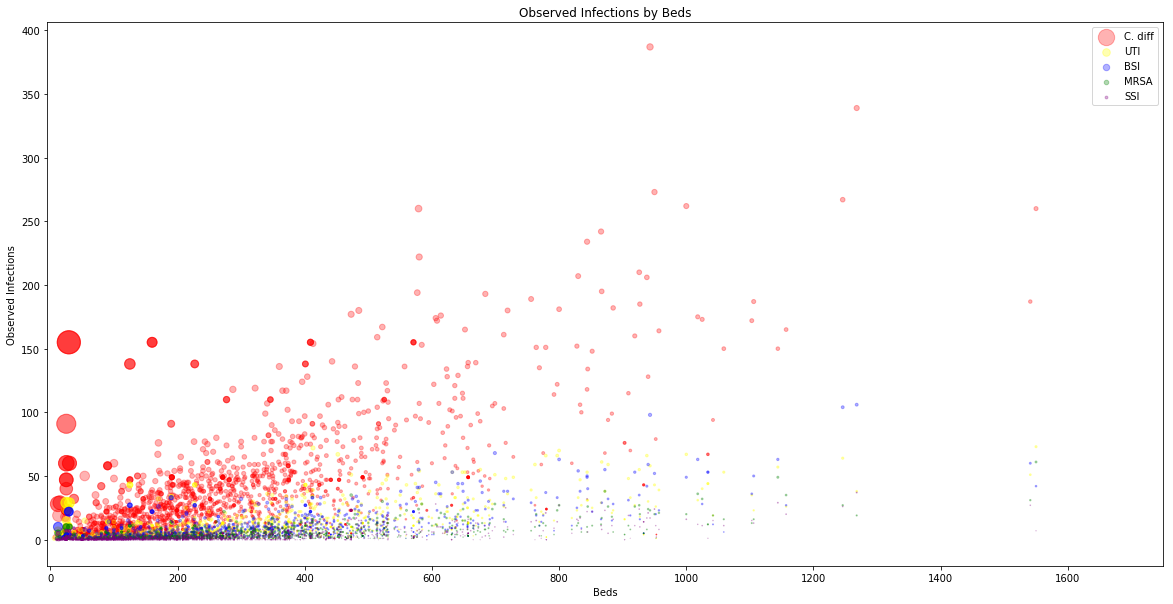

In [34]:
# Number of infections by bed

#Change fig size
plt.figure(figsize=(20,10))

plt.scatter(final_df['Beds'], final_df['C.diff Observed Cases'], c = 'red', marker='o', s=final_df['% C. diff'], alpha=0.3, label='C. diff')
plt.scatter(final_df['Beds'], final_df['CAUTI: Observed Cases'], c = 'yellow', marker='o', s=final_df['% CAUTI'], alpha=0.3, label='UTI')
plt.scatter(final_df['Beds'], final_df['CLABSI: Observed Cases'], c = 'blue', marker='o', s=final_df['% CLABSI'], alpha=0.3, label='BSI')
plt.scatter(final_df['Beds'], final_df['MRSA Observed Cases'], c = 'green', marker='o', s=final_df['% MRSA'], alpha=0.3, label='MRSA')
plt.scatter(final_df['Beds'], final_df['SSI: Colon Observed Cases'], c = 'purple', marker='o', s=final_df['% SSI'], alpha=0.3, label = 'SSI')

#adding grid            
#plt.grid(True)



# x-axis labels, y-axis labels, title, legend
plt.xlim(-5,1750)
plt.title('Observed Infections by Beds')
plt.xlabel('Beds')
plt.ylabel('Observed Infections')
plt.legend(loc='best')
plt.savefig('observed_infections_by_bed.png')

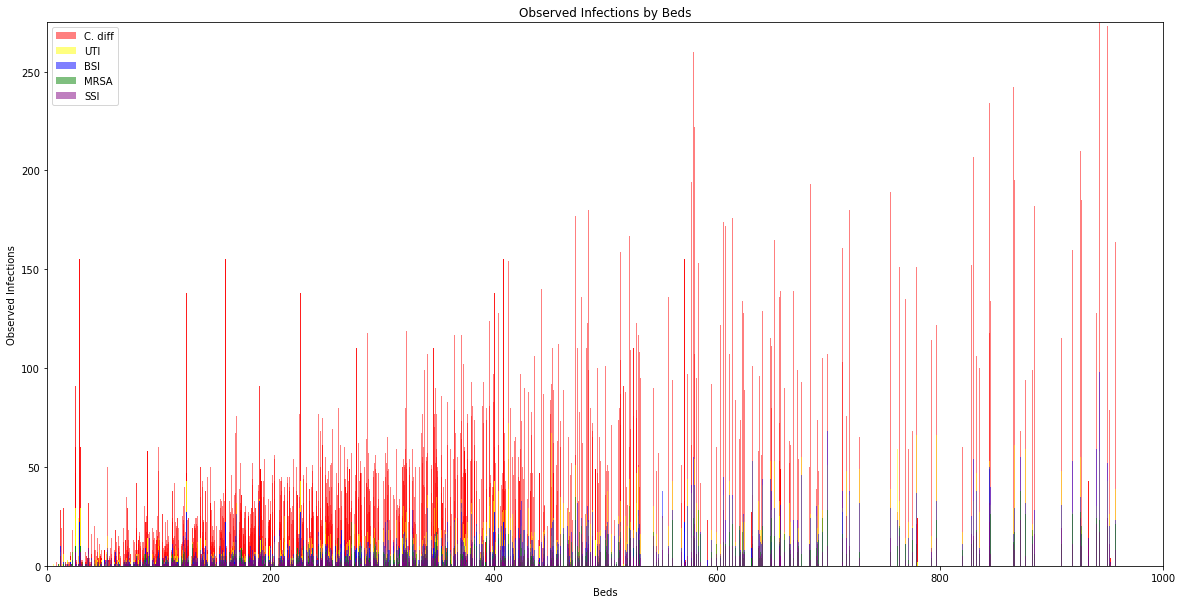

In [35]:
#stacked bar chart of above scatter plot
plt.figure(figsize=(20,10))
plt.bar(final_df['Beds'], final_df['C.diff Observed Cases'], color = 'red', alpha=0.5, label='C. diff')
plt.bar(final_df['Beds'], final_df['CAUTI: Observed Cases'], color = 'yellow', alpha=0.5, label='UTI')
plt.bar(final_df['Beds'], final_df['CLABSI: Observed Cases'], color = 'blue', alpha=0.5, label='BSI')
plt.bar(final_df['Beds'], final_df['MRSA Observed Cases'], color = 'green', alpha=0.5, label='MRSA')
plt.bar(final_df['Beds'], final_df['SSI: Colon Observed Cases'], color = 'purple', alpha=0.5, label = 'SSI')


#adding grid            
#plt.grid(True)

plt.xlim(0,1000)
plt.ylim(0,275)
plt.title('Observed Infections by Beds')
plt.xlabel('Beds')
plt.ylabel('Observed Infections')
plt.legend(loc='best')
plt.savefig('observed_infections_by_bed-bar.png')

In [36]:
#Hospital types
hosp_types = (actual_observed_df['Type']).values
hosp_types = np.unique(hosp_types)

In [37]:
#Hospital owners
hosp_owner = (actual_observed_df['Owner']).values
hosp_owner = np.unique(hosp_owner)

In [38]:
#Filter by owner 'GOVERNMENT - FEDERAL' 'GOVERNMENT - LOCAL' 'GOVERNMENT - STATE' 'NON-PROFIT' 'NOT AVAILABLE' 'PROPRIETARY' 'REGIONAL GOVERNMENT'
fed = actual_observed_df[actual_observed_df['Owner']=='GOVERNMENT - FEDERAL']
state = actual_observed_df[actual_observed_df['Owner']=='GOVERNMENT - STATE']
charity = actual_observed_df[actual_observed_df['Owner']=='NON-PROFIT']
#not_avail = actual_observed_df[actual_observed_df['Owner']=='NOT AVAILABLE']
private = actual_observed_df[actual_observed_df['Owner']=='PROPRIETARY']
regional = actual_observed_df[actual_observed_df['Owner']=='REGIONAL GOVERNMENT']

In [39]:
#Filter by type 'CHILDREN' 'CHRONIC DISEASE' 'CRITICAL ACCESS' 'GENERAL ACUTE CARE' 'LONG TERM CARE' 'PSYCHIATRIC' 'REHABILITATION' 'SPECIAL' 'WOMEN'
child = actual_observed_df[actual_observed_df['Type']=='CHILDREN']
chronic = actual_observed_df[actual_observed_df['Type']=='CHRONIC DISEASE']
critical =actual_observed_df[actual_observed_df['Type']=='CRITICAL ACCESS']
general = actual_observed_df[actual_observed_df['Type']=='GENERAL ACUTE CARE']
LTC = actual_observed_df[actual_observed_df['Type']=='LONG TERM CARE']
psych =actual_observed_df[actual_observed_df['Type']=='PSYCHIATRIC']
rehab =actual_observed_df[actual_observed_df['Type']=='REHABILITATION']
special =actual_observed_df[actual_observed_df['Type']=='SPECIAL']
women = actual_observed_df[actual_observed_df['Type']=='WOMEN']

In [40]:
#Mean by owner 
fed_mean = fed.groupby(['Owner']).mean()
state_mean = state.groupby(['Owner']).mean()
charity_mean = charity.groupby(['Owner']).mean()
#not_avail_bed = not_avail.groupby(['Owner','Beds']).mean()
private_mean = private.groupby(['Owner']).mean()
regional_mean = regional.groupby(['Owner']).mean()

In [41]:
#Mean by type
child_mean = child.groupby(['Type']).mean()
chronic_mean = chronic.groupby(['Type']).mean()
critical_mean = critical.groupby(['Type']).mean()
general_mean = general.groupby(['Type']).mean()
LTC_mean = LTC.groupby(['Type']).mean()
psych_mean = psych.groupby(['Type']).mean()
rehab_mean = rehab.groupby(['Type']).mean()
special_mean = special.groupby(['Type']).mean()
women_mean = women.groupby(['Type']).mean()

In [42]:
#beds by type
beds_types = [child_mean['Beds'].values[0],
              chronic_mean['Beds'].values[0],
              critical_mean['Beds'].values[0],
              general_mean['Beds'].values[0],
              LTC_mean['Beds'].values[0],
              psych_mean['Beds'].values[0],
              rehab_mean['Beds'].values[0],
              special_mean['Beds'].values[0],
              women_mean['Beds'].values[0]] 

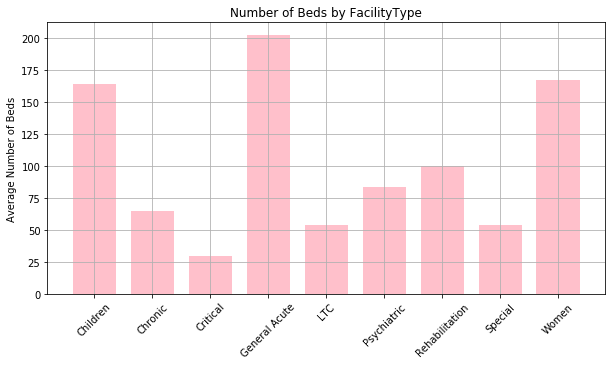

In [43]:
#bar graph average beds by type of hospital

fig, ax = plt.subplots(figsize=(10,5))
ind = np.arange(len(beds_types))
labels = ['Children','Chronic','Critical','General Acute','LTC','Psychiatric','Rehabilitation','Special','Women']

width = 0.75
ax.set_xticks(ind)
ax.set_title("Number of Beds by FacilityType")
ax.set_ylabel("Average Number of Beds")
ax.set_xticklabels(labels, rotation=45)
beds_type = ax.bar(ind,beds_types, width, color = "pink")

plt.grid(True)
plt.savefig('beds_by_type.png')

In [44]:
#beds by owner of hospital
beds_owner = [fed_mean['Beds'].values[0],
            regional_mean['Beds'].values[0],
            state_mean['Beds'].values[0],
            charity_mean['Beds'].values[0],
            private_mean['Beds'].values[0]]

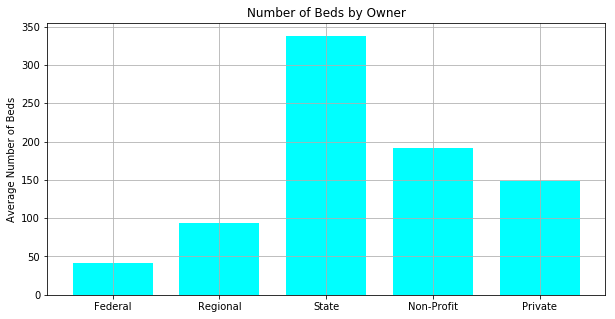

In [45]:
#bar graph average beds by owner
fig, ax = plt.subplots(figsize=(10,5))
ind = np.arange(len(beds_owner))

ax.set_xticks(ind)
ax.set_title("Number of Beds by Owner")
ax.set_ylabel("Average Number of Beds")
ax.set_xticklabels(('Federal','Regional','State','Non-Profit','Private'))
width = 0.75
beds_owner = ax.bar(ind,beds_owner, width, color = "cyan")

plt.grid(True)
plt.savefig('beds_by_owner.png')

In [46]:
#owner by type
fed_own = fed.groupby(['Type'])['Owner'].count()
state_own = state.groupby(['Type'])['Owner'].count()
charity_own = charity.groupby(['Type'])['Owner'].count()
private_own = private.groupby(['Type'])['Owner'].count()
regional_own = regional.groupby(['Type'])['Owner'].count()

In [47]:
#Percentage of each type by owner
fed_calc = sum(fed_own)
fed_per = (fed_own/fed_calc)*100

state_calc = sum(state_own)
state_per = (state_own/state_calc)*100

charity_calc = sum(charity_own)
charity_per = (charity_own/charity_calc)*100

priv_calc = sum(private_own)
priv_per = (private_own/priv_calc)*100

reg_calc = sum(regional_own)
reg_per = (regional_own/reg_calc)*100

In [48]:
#DF of percentage type by owner
owner_type_percent = {'Federal':fed_per,
                      'Regional':reg_per,
                      'State':state_per, 
                      'Non-Profit':charity_per, 
                      'Private':priv_per}
owner_type_percent_df = pd.DataFrame(owner_type_percent)

In [49]:
owner_type_percent_df

Federal  Non-Profit    Private   Regional  State
CHILDREN                  NaN    2.179177   0.547945        NaN    NaN
CHRONIC DISEASE           NaN    0.048426        NaN        NaN    NaN
CRITICAL ACCESS     57.142857   20.387409   4.931507  41.036717    NaN
GENERAL ACUTE CARE  42.857143   76.658596  87.808219  58.747300   85.0
LONG TERM CARE            NaN    0.048426   0.958904        NaN    2.5
PSYCHIATRIC               NaN    0.242131   0.958904   0.215983    NaN
REHABILITATION            NaN    0.145278   0.410959        NaN    2.5
SPECIAL                   NaN    0.242131   4.246575        NaN   10.0
WOMEN                     NaN    0.048426   0.136986        NaN    NaN

In [50]:
#DF looks better with 0 replacing NaN
owner_type_percent_df = owner_type_percent_df.fillna(0)

In [51]:
owner_type_percent_df

Federal  Non-Profit    Private   Regional  State
CHILDREN             0.000000    2.179177   0.547945   0.000000    0.0
CHRONIC DISEASE      0.000000    0.048426   0.000000   0.000000    0.0
CRITICAL ACCESS     57.142857   20.387409   4.931507  41.036717    0.0
GENERAL ACUTE CARE  42.857143   76.658596  87.808219  58.747300   85.0
LONG TERM CARE       0.000000    0.048426   0.958904   0.000000    2.5
PSYCHIATRIC          0.000000    0.242131   0.958904   0.215983    0.0
REHABILITATION       0.000000    0.145278   0.410959   0.000000    2.5
SPECIAL              0.000000    0.242131   4.246575   0.000000   10.0
WOMEN                0.000000    0.048426   0.136986   0.000000    0.0

In [52]:
# C. diff by owner
cd_owner = [fed_mean['C.diff Observed Cases'].values[0], 
            regional_mean['C.diff Observed Cases'].values[0],
            state_mean['C.diff Observed Cases'].values[0],
            charity_mean['C.diff Observed Cases'].values[0],
            private_mean['C.diff Observed Cases'].values[0]]

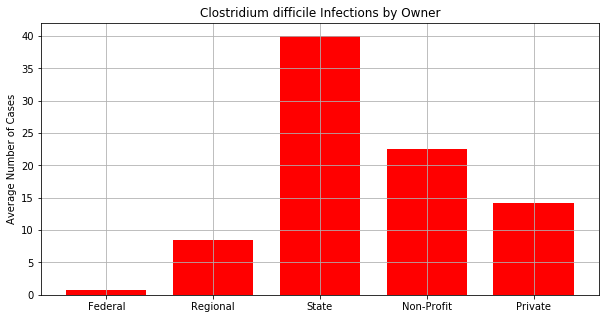

In [53]:
#bar graph of mean by owner, C. diff
fig, ax = plt.subplots(figsize=(10,5))
ind = np.arange(len(cd_owner))

ax.set_xticks(ind)
ax.set_title("Clostridium difficile Infections by Owner")
ax.set_ylabel("Average Number of Cases")
ax.set_xticklabels(('Federal','Regional','State','Non-Profit','Private'))
width = 0.75
cd = ax.bar(ind,cd_owner, width, color = 'red')

plt.grid(True)
plt.savefig('cd_by_owner.png')

In [54]:
#mean of all observed infections by owner
all_infect_fed = (fed['C.diff Observed Cases'] +
              fed['CAUTI: Observed Cases'] +
              fed['CLABSI: Observed Cases'] +
              fed['MRSA Observed Cases'] +
              fed['SSI: Colon Observed Cases']).values[0]

all_infect_reg = (regional['C.diff Observed Cases'] +
              regional['CAUTI: Observed Cases'] +
              regional['CLABSI: Observed Cases'] +
              regional['MRSA Observed Cases'] +
              regional['SSI: Colon Observed Cases']).values[0]

all_infect_state = (state['C.diff Observed Cases'] +
              state['CAUTI: Observed Cases'] +
              state['CLABSI: Observed Cases'] +
              state['MRSA Observed Cases'] +
              state['SSI: Colon Observed Cases']).values[0]
all_infect_non = (charity['C.diff Observed Cases'] +
              charity['CAUTI: Observed Cases'] +
              charity['CLABSI: Observed Cases'] +
              charity['MRSA Observed Cases'] +
              charity['SSI: Colon Observed Cases']).values[0]

all_infect_priv = (private['C.diff Observed Cases'] +
              private['CAUTI: Observed Cases'] +
              private['CLABSI: Observed Cases'] +
              private['MRSA Observed Cases'] +
              private['SSI: Colon Observed Cases']).values[0]

In [55]:
#List for graph of infections by owner
own_infect = [all_infect_fed, all_infect_reg, all_infect_state,all_infect_non,all_infect_priv]

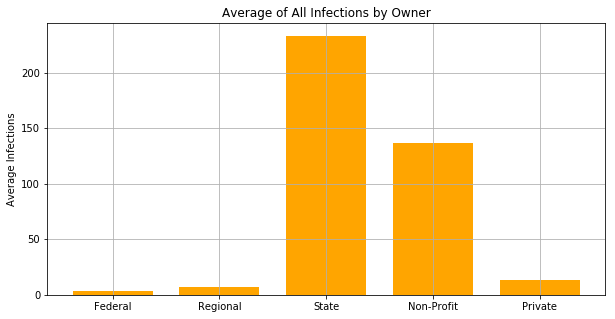

In [56]:
#Graph of average infections by owner
fig, ax = plt.subplots(figsize=(10,5))
ind = np.arange(len(own_infect))

ax.set_xticks(ind)
ax.set_title("Average of All Infections by Owner")
ax.set_ylabel('Average Infections')
ax.set_xticklabels(('Federal','Regional','State','Non-Profit','Private'))
width = 0.75
own = ax.bar(ind,own_infect, width, color = "orange")

plt.grid(True)
plt.savefig('avg_infect_by_owner.png')

In [57]:
#mean of all observed infections by type
#'Children','Chronic','Critical','General Acute','LTC','Psychiatric','Rehabilitation','Special','Women'
all_infect_child = (child['C.diff Observed Cases'] +
              child['CAUTI: Observed Cases'] +
              child['CLABSI: Observed Cases'] +
              child['MRSA Observed Cases'] +
              child['SSI: Colon Observed Cases']).values[0]

all_infect_chronic = (chronic['C.diff Observed Cases'] +
              chronic['CAUTI: Observed Cases'] +
              chronic['CLABSI: Observed Cases'] +
              chronic['MRSA Observed Cases'] +
              chronic['SSI: Colon Observed Cases']).values[0]

all_infect_critical = (critical['C.diff Observed Cases'] +
              critical['CAUTI: Observed Cases'] +
              critical['CLABSI: Observed Cases'] +
              critical['MRSA Observed Cases'] +
              critical['SSI: Colon Observed Cases']).values[0]

all_infect_gen = (general['C.diff Observed Cases'] +
              general['CAUTI: Observed Cases'] +
              general['CLABSI: Observed Cases'] +
              general['MRSA Observed Cases'] +
              general['SSI: Colon Observed Cases']).values[0]

all_infect_ltc = (LTC['C.diff Observed Cases'] +
              LTC['CAUTI: Observed Cases'] +
              LTC['CLABSI: Observed Cases'] +
              LTC['MRSA Observed Cases'] +
              LTC['SSI: Colon Observed Cases']).values[0]

all_infect_psych = (psych['C.diff Observed Cases'] +
              psych['CAUTI: Observed Cases'] +
              psych['CLABSI: Observed Cases'] +
              psych['MRSA Observed Cases'] +
              psych['SSI: Colon Observed Cases']).values[0]

all_infect_rehab = (rehab['C.diff Observed Cases'] +
              rehab['CAUTI: Observed Cases'] +
              rehab['CLABSI: Observed Cases'] +
              rehab['MRSA Observed Cases'] +
              rehab['SSI: Colon Observed Cases']).values[0]

all_infect_special = (special['C.diff Observed Cases'] +
              special['CAUTI: Observed Cases'] +
              special['CLABSI: Observed Cases'] +
              special['MRSA Observed Cases'] +
              special['SSI: Colon Observed Cases']).values[0]

all_infect_women = (women['C.diff Observed Cases'] +
              women['CAUTI: Observed Cases'] +
              women['CLABSI: Observed Cases'] +
              women['MRSA Observed Cases'] +
              women['SSI: Colon Observed Cases']).values[0]


In [58]:
#infections by facility
type_infect = [all_infect_child,
               all_infect_chronic,
               all_infect_critical,
               all_infect_gen,
               all_infect_ltc,
               all_infect_psych,
               all_infect_rehab,
               all_infect_special,
               all_infect_women]

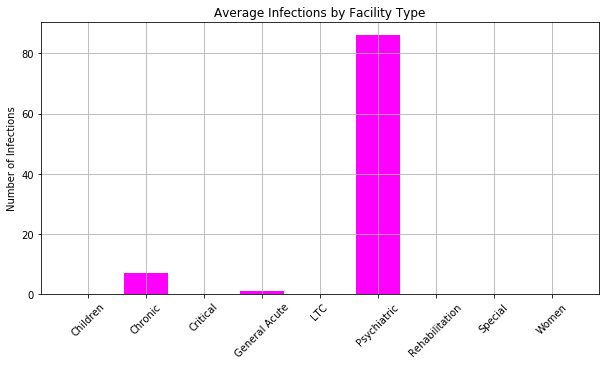

In [59]:
#average of all infections by facility type
#Interesting discovery about this missing data, therefore graph left out of presentation & explaination used instead.
fig, ax = plt.subplots(figsize=(10,5))
ind = np.arange(len(type_infect))
labels = ['Children','Chronic','Critical','General Acute','LTC','Psychiatric','Rehabilitation','Special','Women']

ax.set_xticks(ind)
ax.set_title("Average Infections by Facility Type")
ax.set_ylabel("Number of Infections")
ax.set_xticklabels(labels, rotation=45)
infect_type = ax.bar(ind,type_infect, width, color = "magenta")

plt.grid(True)
plt.savefig('average_infections_by_facility_type.png')

In [60]:
#Setup for graph of C. diff by facility type
type_cd = [child_mean['C.diff Observed Cases'].values[0],
           chronic_mean['C.diff Observed Cases'].values[0],
           critical_mean['C.diff Observed Cases'].values[0],
           general_mean['C.diff Observed Cases'].values[0],
           LTC_mean['C.diff Observed Cases'].values[0],
           psych_mean['C.diff Observed Cases'].values[0],
           rehab_mean['C.diff Observed Cases'].values[0],
           special_mean['C.diff Observed Cases'].values[0],
           women_mean['C.diff Observed Cases'].values[0]]

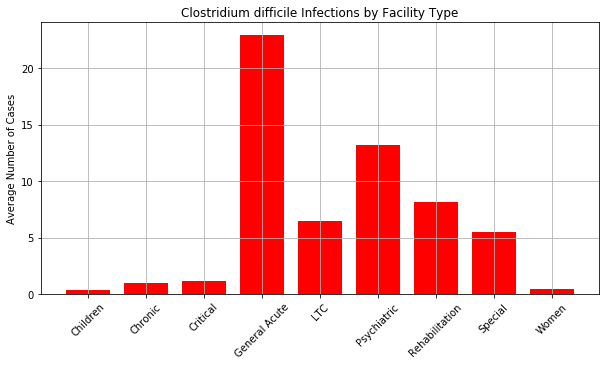

In [61]:
#Bar plot of C. diff by facility type
fig, ax = plt.subplots(figsize=(10,5))
ind = np.arange(len(type_cd))

ax.set_xticks(ind)
ax.set_title("Clostridium difficile Infections by Facility Type")
ax.set_ylabel("Average Number of Cases")
ax.set_xticklabels(('Children', 'Chronic, Critical', 'General', 'LTC','Psychiatric','Rehabilitation','Special','Women'))
ax.set_xticklabels(labels, rotation=45)
width = 0.75
bsi = ax.bar(ind,type_cd, width, color = 'red')

plt.grid(True)
plt.savefig('cd_by_type.png')